In [1]:
# import code
from simulation import Simulation
from simulation import Ambulance
import matplotlib.pyplot as plt
import numpy as np
import time

# Scenario #1: Increased Uncertainty in Movement
## Part 1 of 2: Simulation with Complete Certainty
This scenario evaluates the impact on an MDP policy’s “best route” if the likelihood of moving in an unintended direction (i.e., accidentally taking a wrong turn) is considered. We run two simulations for the same five-by-five city with three ambulances. The maximum traversal time for a city block is four minutes, and the CSP solves for ambulance placement to guarantee a six-minute response to any accident location. In the first simulation, we assume a 100 percent certainty in movement, thus ensuring an ambulance moves from an intersection in its intended direction 100 percent of the time. In the second simulation, we assume an ambulance moves in its intended direction 95 percent of the time and in either perpendicular direction 2.5 percent of the time each. If an ambulance attempts to move off the defined city grid, it remains in its location for the time step.

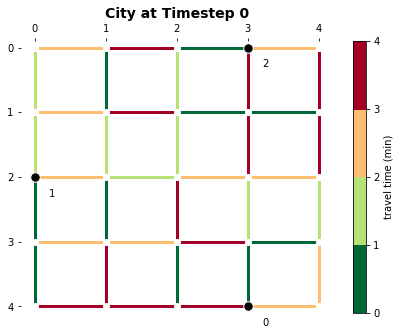

In [2]:
# initialize city and solve CSP
demo_simulation = Simulation(city_size=5, min_ambulance=3, max_time=4, p_int=1)
demo_simulation.csp_ambulance(guarantee_time=6, verbose=False)
demo_simulation.show_city()

Accident location:  [0 2]

Policy: 
A=accident, n=north, s=south, e=east, w=west
[['e' 'e' 'A' 'w' 'w']
 ['e' 'n' 'n' 'w' 'w']
 ['e' 'e' 'n' 'w' 'n']
 ['n' 'n' 'n' 'n' 'w']
 ['n' 'n' 'n' 'n' 'n']]

Responding ambulance:  2



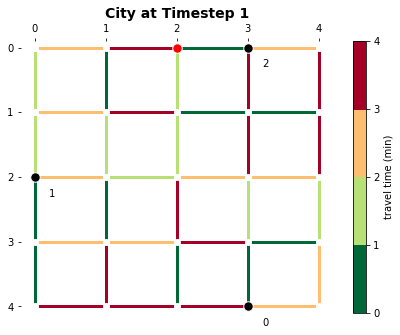

In [3]:
# Generate accident and solve MDP
demo_simulation.step()    
print('Accident location: ', demo_simulation.accident_location)
print('\nPolicy: \nA=accident, n=north, s=south, e=east, w=west')
demo_simulation.show_policy((demo_simulation.accident_location[0],demo_simulation.accident_location[1]))
print('\nResponding ambulance: ', demo_simulation.responding_ambulance_id)
print('')
demo_simulation.show_city()

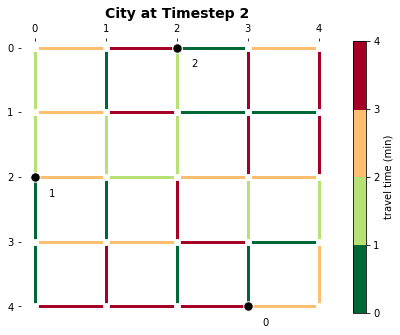

In [4]:
# Move responding ambulance
while not demo_simulation.ambulance_reached:
    demo_simulation.step()
    demo_simulation.show_city()

## Part 2 of 2: Simulation with Uncertainty in Movement
Ambulances move in intended direction 95% of the time and in either perpendicular direction the remaining 5% of the time with equal probability (p_int = 0.95).

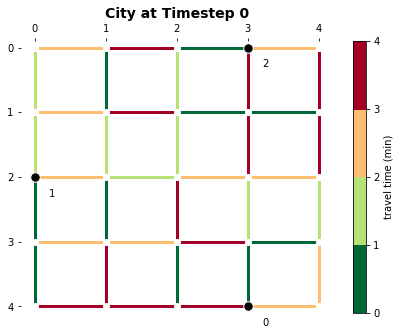

In [5]:
# initialize city and solve CSP
scenario_1 = Simulation(city_size=5, min_ambulance=3, max_time=4, p_int=0.95)
scenario_1.csp_ambulance(guarantee_time=6, verbose=False)
scenario_1.show_city()

Accident location:  [0 2]

Policy: 
A=accident, n=north, s=south, e=east, w=west
[['e' 'e' 'A' 'w' 'w']
 ['e' 'n' 'n' 'w' 'w']
 ['n' 'n' 'n' 'n' 'n']
 ['n' 'n' 'n' 'n' 'n']
 ['n' 'n' 'n' 'n' 'n']]
Previous policy from demo: 
[['e' 'e' 'A' 'w' 'w']
 ['e' 'n' 'n' 'w' 'w']
 ['e' 'e' 'n' 'w' 'n']
 ['n' 'n' 'n' 'n' 'w']
 ['n' 'n' 'n' 'n' 'n']]

Responding ambulance:  2



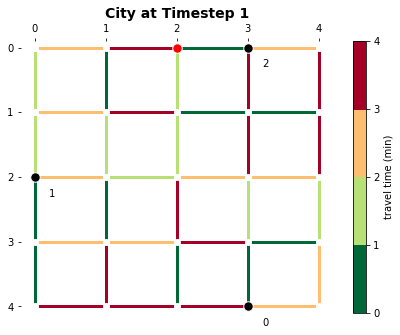

In [6]:
# Generate accident and solve MDP
scenario_1.step()    
print('Accident location: ', scenario_1.accident_location)
print('\nPolicy: \nA=accident, n=north, s=south, e=east, w=west')
scenario_1.show_policy((scenario_1.accident_location[0],scenario_1.accident_location[1]))
print('Previous policy from demo: ')
demo_simulation.show_policy((demo_simulation.accident_location[0],demo_simulation.accident_location[1]))
print('\nResponding ambulance: ', scenario_1.responding_ambulance_id)
print('')
scenario_1.show_city()

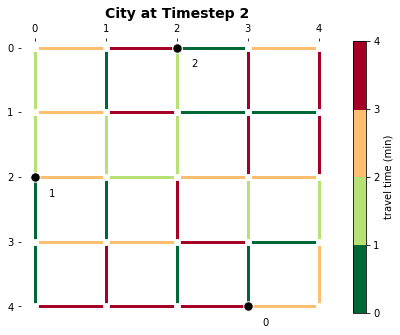

In [7]:
# Move responding ambulance
while not scenario_1.ambulance_reached:
    scenario_1.step()
    scenario_1.show_city()

# Scenario #2: Random vs. CSP Placement of Ambulances
We test the effectiveness of our CSP implementation using a Monte Carlo analysis for both random ambulance placement and CSP placement. Each method is simulated 1000 times with a different random seed for each iteration. Again, we use a five-by-five city with a maximum traversal time of four minutes for any city block. Ambulances move in the intended direction 100 percent of the time. A guarantee of six minutes is specified for the CSP. As described in the Approach section, the CSP algorithm may add ambulances if it cannot solve the problem in a prespecified number of iterations. To maintain consistency, we initialize the corresponding random placement simulation with the same number of ambulances resulting from the CSP solution.

## Part 1 of 2: Compare Select Simulations
First, we compare ambulance placement under CSP and random heuristics for a few simulations.

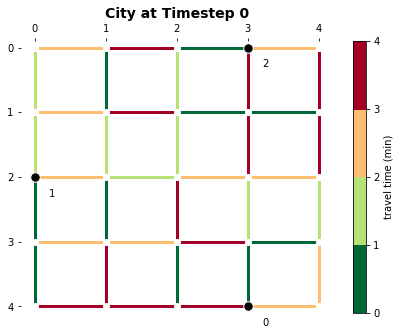

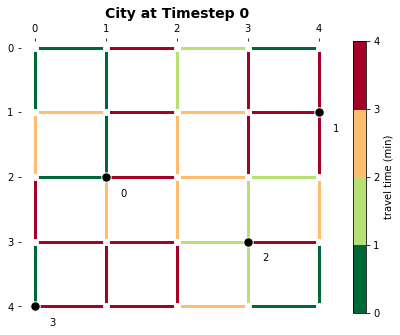

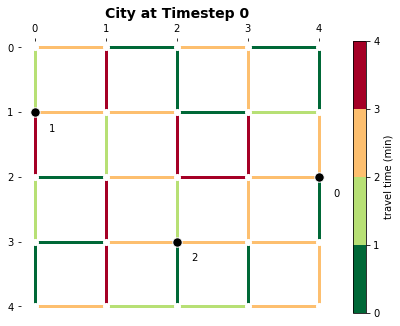

In [8]:
# Compare ambulance placement under CSP model
num_simulations = [42, 2, 13]
num_ambulances = []

for n in num_simulations:

    # run scenario with CSP placement
    csp_sim = Simulation(city_size=5, min_ambulance=3, max_time=4, p_int=1, seed=n)
    csp_sim.csp_ambulance(guarantee_time=6, verbose=False)
    csp_sim.show_city()
    
    # record number of ambulances
    num_ambulances.append(len(csp_sim.ambulances.keys()))

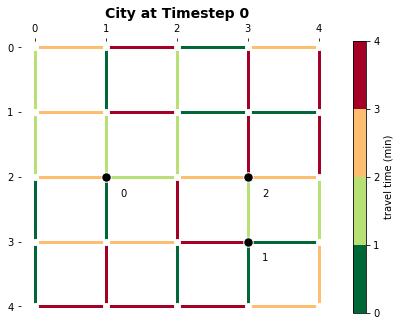

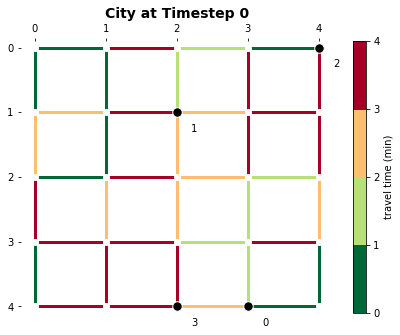

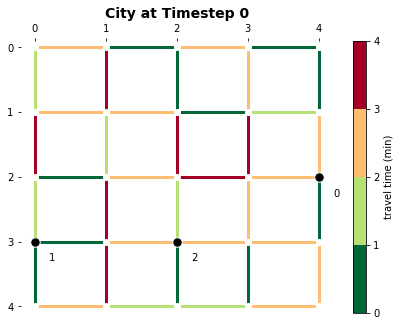

In [9]:
# Compare random ambulance placement
for i,n in enumerate(num_simulations):

    # run scenario with random placement
    random_sim = Simulation(city_size=5, min_ambulance=num_ambulances[i], max_time=4, p_int=1, seed=n)
    random_sim.random_ambulance(verbose=False)
    random_sim.show_city()

## Part 2 of 2: Run Monte Carlo Simulation
NOTE: The following code takes over an hour to run. See explanation of Scenario #2 above for full description. Data resulting from this scenario is stored in the /data folder.

In [ ]:
# num_simulations = 1000
# csp_response_times = []
# random_response_times = []

# for n in range(num_simulations):
#     # run scenario with CSP placement
#     csp_sim = Simulation(city_size=5, min_ambulance=3, max_time=4, p_int=1, seed=n)
#     csp_sim.csp_ambulance(guarantee_time=6, verbose=False)
#     csp_sim.step() # generates accident and solves MDP
    
#     # record time and number of ambulances
#     csp_response_times.append(csp_sim.response_time)
#     num_ambulances = len(csp_sim.ambulances.keys())

#     # run scenario with random placement
#     random_sim = Simulation(city_size=5, min_ambulance=num_ambulances, max_time=4, p_int=1, seed=n)
#     random_sim.random_ambulance(verbose=False)
#     random_sim.step() # generates accident and solves MDP
    
#     # record time and number of ambulances
#     random_response_times.append(random_sim.response_time)

#     # print progress
#     if n % 100 == 0:
#         print('Done with {} simulations.'.format(n))

# random_response_times = np.array(random_response_times)
# csp_response_times = np.array(csp_response_times)

# # save data
# np.savetxt("csp_response_times.csv", csp_response_times, delimiter=",")
# np.savetxt("random_response_times.csv", random_response_times, delimiter=",")

Done with 0 simulations.
Done with 100 simulations.
Done with 200 simulations.
Done with 300 simulations.
Done with 400 simulations.
Done with 500 simulations.
Done with 600 simulations.
Done with 700 simulations.
Done with 800 simulations.
Done with 900 simulations.


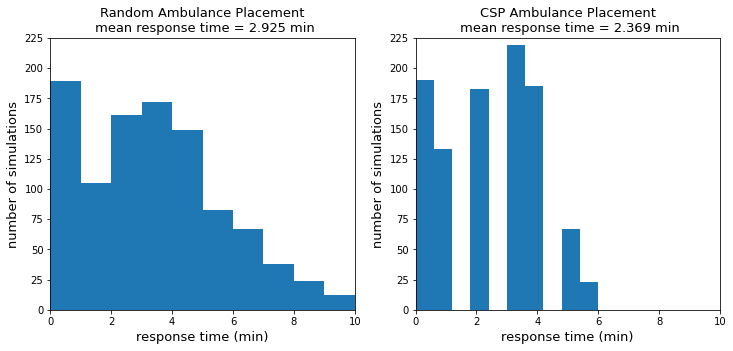

In [ ]:
# analyze results
mean_random = np.mean(random_response_times)
mean_csp = np.mean(csp_response_times)

# plot results
fig,ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].hist(random_response_times, bins=10)
ax[1].hist(csp_response_times, bins=10)
ax[0].axis([0, 10, 0, 225])
ax[1].axis([0, 10, 0, 225])
ax[0].set_xlabel('response time (min)', fontsize=13)
ax[1].set_xlabel('response time (min)', fontsize=13)
ax[0].set_ylabel('number of simulations', fontsize=13)
ax[1].set_ylabel('number of simulations', fontsize=13)
ax[0].set_title('Random Ambulance Placement\n mean response time = {} min'.format(mean_random), fontsize=13)
ax[1].set_title('CSP Ambulance Placement\n mean response time = {} min'.format(mean_csp), fontsize=13)

plt.show()

# Scenario #3: Increased City Size
This scenario measures the run time of our model by increasing the complexity of the problem with a larger city size. We measure on-the-wall clock time of solving both the CSP and MDP components of simulations for a five-by-five, ten-by-ten, fifteen-by-fifteen, twenty-by-twenty, and thirty-by-thirty city size. All simulations use the same random seed and a 100 percent certainty in ambulance movement. For this analysis, we scale up the constraint for the CSP proportionately as we increase city size (higher guaranteed response time for larger cities). As part of future work, we would solve for minimal guaranteed response times possible with a given number of ambulances while varying city sizes.

In [ ]:
# intialize parameters
sizes = [5, 10, 15, 20]
guarantee = [(s/5 + s) for s in sizes]
csp_times = []
mdp_times = []

# run simulations and record time
for s,g in zip(sizes, guarantee):
    start = time.time()
    
    # run CSP and record time
    time_sim = Simulation(city_size=s, min_ambulance=3, max_time=4, p_int=1)
    time_sim.csp_ambulance(guarantee_time=g, csp_iterations=4, num_blocks=4, verbose=False)
    stop_csp = time.time()

    # run MDP and record time
    time_sim.step()
    stop_mdp = time.time()

    csp_times.append(stop_csp - start)
    mdp_times.append(stop_mdp - stop_csp)

    print('Done with city size {}.'.format(s))

sizes = np.array(sizes)
csp_times = np.array(csp_times)
mdp_times = np.array(mdp_times)

Done with city size 5.
Done with city size 10.
Done with city size 15.
Done with city size 20.


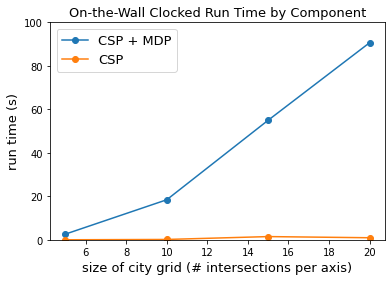

In [ ]:
# plot results
fig,ax = plt.subplots(1, 1)
ax.plot(sizes, mdp_times + csp_times, label='CSP + MDP', marker='o')
ax.plot(sizes, csp_times, label='CSP', marker='o')
ax.set_ylim([0, 100])
ax.set_ylabel('run time (s)', fontsize=13)
ax.set_xlabel('size of city grid (# intersections per axis)', fontsize=13)
ax.set_title('On-the-Wall Clocked Run Time by Component', fontsize=13)
ax.legend(loc='best', fontsize=13)

plt.show()